In [2]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import soundfile as sf

from itertools import cycle
from glob import glob

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

### 1. Data loading

In [12]:
# Main path
main_path = r"C:\Users\Pannatad\Documents\Birds - Projects\Main\xeno_audio"

# Read folder
species_folders = [f for f in os.listdir(main_path) if os.path.isdir(os.path.join(main_path, f))]
print(species_folders)

['acridotheres_grandis', 'acridotheres_tristis', 'aegithina_tiphia', 'amaurornis_phoenicurus', 'anastomus_oscitans', 'anthreptes_malacensis', 'ardeola_bacchus', 'ardeola_speciosa', 'athene_brama', 'butorides_striata', 'cacomantis_merulinus', 'centropus_sinensis', 'copsychus_saularis', 'coracias_affinis', 'corvus_macrorhynchos', 'dicaeum_cruentatum', 'dicrurus_leucophaeus', 'geopelia_striata', 'gracupica_contra', 'gracupica_nigricollis', 'halcyon_pileata', 'halcyon_smyrnensis', 'ixobrychus_cinnamomeus', 'ixobrychus_sinensis', 'lonchura_punctulata', 'merops_philippinus', 'microcarbo_niger', 'oriolus_chinensis', 'pelargopsis_capensis', 'prinia_flaviventris', 'prinia_inornata', 'psilopogon_haemacephalus', 'pycnonotus_conradi', 'pycnonotus_goiavier', 'rhipidura_javanica', 'spilopelia_chinensis', 'streptopelia_tranquebarica', 'treron_vernans']


In [ ]:
# print(all audio files)
all_audio_files = []
for species in species_folders:
    species_path = os.path.join(main_path, species)
    audio_files_in_species = glob(os.path.join(species_path, '*.wav'))

    print(f" -> found {len(audio_files_in_species)} files of species {species}")
    all_audio_files.extend(audio_files_in_species)

print(f"\nfound {len(all_audio_files)} files from {len(species_folders)} species")
#print(audio_files_in_species)

 -> found 31 files of species acridotheres_grandis
 -> found 30 files of species acridotheres_tristis
 -> found 45 files of species aegithina_tiphia
 -> found 32 files of species amaurornis_phoenicurus
 -> found 1 files of species anastomus_oscitans
 -> found 39 files of species anthreptes_malacensis
 -> found 2 files of species ardeola_bacchus
 -> found 2 files of species ardeola_speciosa
 -> found 16 files of species athene_brama
 -> found 2 files of species butorides_striata
 -> found 43 files of species cacomantis_merulinus
 -> found 25 files of species centropus_sinensis
 -> found 0 files of species copsychus_saularis
 -> found 33 files of species coracias_affinis
 -> found 35 files of species corvus_macrorhynchos
 -> found 24 files of species dicaeum_cruentatum
 -> found 33 files of species dicrurus_leucophaeus
 -> found 30 files of species geopelia_striata
 -> found 0 files of species gracupica_contra
 -> found 37 files of species gracupica_nigricollis
 -> found 10 files of spec

Choose only species >= 10 files

In [14]:
from glob import glob
import os

all_audio_files = []
valid_species_folders = []  # store only species with enough files
count = 0

for species in species_folders:
    species_path = os.path.join(main_path, species)
    audio_files_in_species = glob(os.path.join(species_path, '*.wav'))

    if len(audio_files_in_species) >= 10:
        print(f" -> found {len(audio_files_in_species)} files of species {species}")
        all_audio_files.extend(audio_files_in_species)
        valid_species_folders.append(species)
        count += 1
    else:
        print(f" -> found {len(audio_files_in_species)} files of species {species} - not enough files, skipping")

print(f"\n✅ Found {len(all_audio_files)} files from {count} species")


 -> found 31 files of species acridotheres_grandis
 -> found 30 files of species acridotheres_tristis
 -> found 45 files of species aegithina_tiphia
 -> found 32 files of species amaurornis_phoenicurus
 -> found 1 files of species anastomus_oscitans - not enough files, skipping
 -> found 39 files of species anthreptes_malacensis
 -> found 2 files of species ardeola_bacchus - not enough files, skipping
 -> found 2 files of species ardeola_speciosa - not enough files, skipping
 -> found 16 files of species athene_brama
 -> found 2 files of species butorides_striata - not enough files, skipping
 -> found 43 files of species cacomantis_merulinus
 -> found 25 files of species centropus_sinensis
 -> found 0 files of species copsychus_saularis - not enough files, skipping
 -> found 33 files of species coracias_affinis
 -> found 35 files of species corvus_macrorhynchos
 -> found 24 files of species dicaeum_cruentatum
 -> found 33 files of species dicrurus_leucophaeus
 -> found 30 files of spec

### 2. Data formatting

####  Preparing Index

In [18]:
import pandas as pd # Hire the master librarian, 'pandas'

# Prepare an empty box to hold our individual index cards
file_data = []

# Use the same loop as before, but now we create a card for each file
for species in valid_species_folders:

    species_path = os.path.join(main_path, species) # \species
    path_pattern = os.path.join(species_path, '*.wav') # \species\*.wav
    audio_files_in_species = glob(path_pattern) # List of all files in this species folder

    
    for file_path in audio_files_in_species:
        # This is where we create one single "index card"
        card = {
            'path': file_path,   # Line 1 on the card: The book's location
            'species': species   # Line 2 on the card: The shelf name (our label!)
        }
        # Put this new card into our box
        file_data.append(card)
print(file_data)

[{'path': 'C:\\Users\\Pannatad\\Documents\\Birds - Projects\\Main\\xeno_audio\\acridotheres_grandis\\1003533_Great_Myna_Thailand_A.wav', 'species': 'acridotheres_grandis'}, {'path': 'C:\\Users\\Pannatad\\Documents\\Birds - Projects\\Main\\xeno_audio\\acridotheres_grandis\\1004358_Great_Myna_Thailand_A.wav', 'species': 'acridotheres_grandis'}, {'path': 'C:\\Users\\Pannatad\\Documents\\Birds - Projects\\Main\\xeno_audio\\acridotheres_grandis\\1004359_Great_Myna_Thailand_A.wav', 'species': 'acridotheres_grandis'}, {'path': 'C:\\Users\\Pannatad\\Documents\\Birds - Projects\\Main\\xeno_audio\\acridotheres_grandis\\1005520_Great_Myna_Thailand_A.wav', 'species': 'acridotheres_grandis'}, {'path': 'C:\\Users\\Pannatad\\Documents\\Birds - Projects\\Main\\xeno_audio\\acridotheres_grandis\\294978_Great_Myna_Thailand_B.wav', 'species': 'acridotheres_grandis'}, {'path': 'C:\\Users\\Pannatad\\Documents\\Birds - Projects\\Main\\xeno_audio\\acridotheres_grandis\\306367_Great_Myna_Thailand_B.wav', 'spec

Assembling data

In [24]:
df = pd.DataFrame(file_data)

# Display head of the DataFrame
print("DataFrame Head:")
print(df.head())
print(df.tail())

DataFrame Head:
                                                path               species
0  C:\Users\Pannatad\Documents\Birds - Projects\M...  acridotheres_grandis
1  C:\Users\Pannatad\Documents\Birds - Projects\M...  acridotheres_grandis
2  C:\Users\Pannatad\Documents\Birds - Projects\M...  acridotheres_grandis
3  C:\Users\Pannatad\Documents\Birds - Projects\M...  acridotheres_grandis
4  C:\Users\Pannatad\Documents\Birds - Projects\M...  acridotheres_grandis
                                                  path               species
695  C:\Users\Pannatad\Documents\Birds - Projects\M...  spilopelia_chinensis
696  C:\Users\Pannatad\Documents\Birds - Projects\M...  spilopelia_chinensis
697  C:\Users\Pannatad\Documents\Birds - Projects\M...  spilopelia_chinensis
698  C:\Users\Pannatad\Documents\Birds - Projects\M...  spilopelia_chinensis
699  C:\Users\Pannatad\Documents\Birds - Projects\M...  spilopelia_chinensis


### 3. Audio Processing

Functions

In [21]:
import librosa # Hire our audio engineering expert, 'librosa'
import numpy as np # And its core assistant for numerical operations

def preprocess_audio(file_path, target_sr=22050, duration=5):
    # ... all the repair logic will go here ...
    try:
        # All the risky operations go here
        ...
    except Exception as e:
        # This code only runs if something in the 'try' block fails
        print(f"Error processing file {file_path}: {e}")
        return None

#### plot some audio in wave form

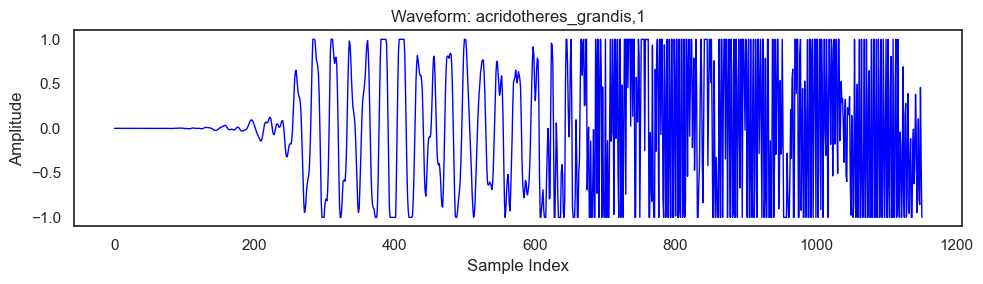

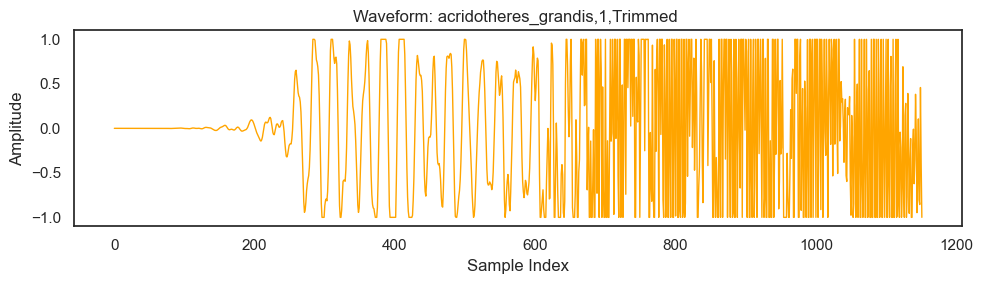

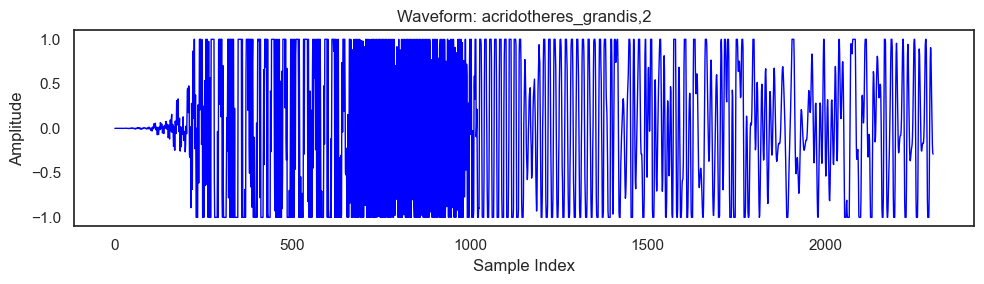

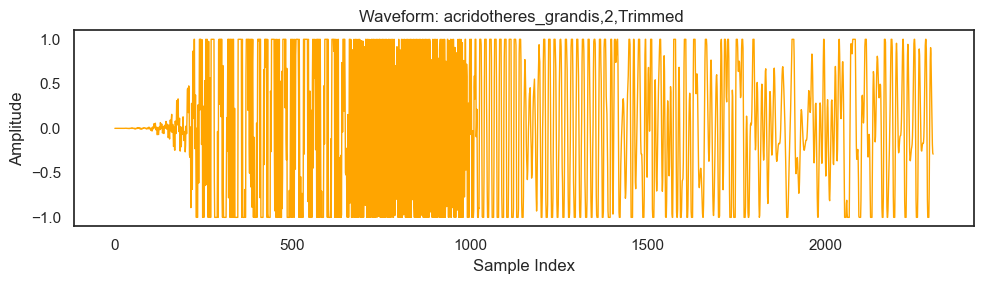

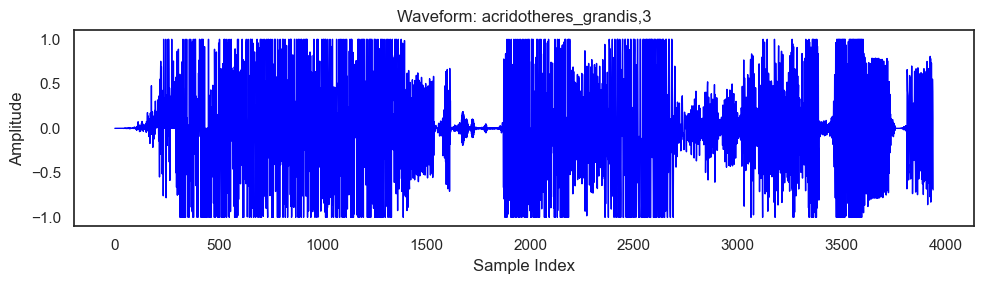

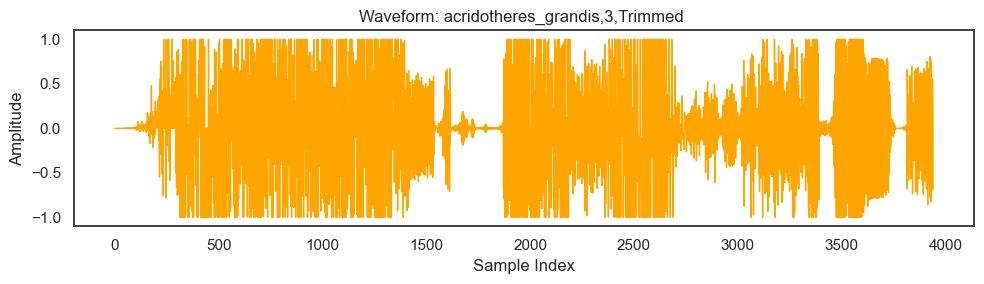

In [26]:
import librosa
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df['path'] contains full paths to .wav files
for i in range(1,4):
    y, sr = librosa.load(df['path'][i], sr=None)
    y_trimmed, _ = librosa.effects.trim(y, top_db=20)
    
    # Plot
    plt.figure(figsize=(10, 3))
    pd.Series(y).plot(lw=1, color='blue')
    plt.title(f'Waveform: {df["species"][i]},{i}')
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 3))
    pd.Series(y_trimmed).plot(lw=1, color='orange')
    plt.title(f'Waveform: {df["species"][i]},{i},Trimmed ')
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()




#### Audio scanning

Removing audio < 0.1 sec

In [ ]:
short_files = df[df['path'].apply(lambda p: librosa.get_duration(filename=p) < 0.1)]
print(f"{len(short_files)} files shorter than 0.1 seconds")


C:\Users\Pannatad\AppData\Local\Temp\ipykernel_17828\3027379687.py:1: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  short_files = df[df['path'].apply(lambda p: librosa.get_duration(filename=p) < 0.1)]


106 files shorter than 100 ms


In [ ]:
import librosa

for idx, row in short_files.iterrows():
    path = row['path']
    duration = librosa.get_duration(filename=path)
    print(f"Index: {idx}, File: {os.path.basename(path)}, Duration: {duration:.3f} sec")


In [28]:
# Create a new DataFrame with only audio files longer than 100 ms (0.1 sec)
df_cut = df[df['path'].apply(lambda p: librosa.get_duration(filename=p) >= 0.1)].reset_index(drop=True)


C:\Users\Pannatad\AppData\Local\Temp\ipykernel_17828\1486197423.py:2: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  df_cut = df[df['path'].apply(lambda p: librosa.get_duration(filename=p) >= 0.1)].reset_index(drop=True)


In [29]:
df_cut

,path,species
0,C:\Users\Pannatad\Documents\Birds - Projects\M...,acridotheres_grandis
1,C:\Users\Pannatad\Documents\Birds - Projects\M...,acridotheres_grandis
2,C:\Users\Pannatad\Documents\Birds - Projects\M...,acridotheres_grandis
3,C:\Users\Pannatad\Documents\Birds - Projects\M...,acridotheres_grandis
4,C:\Users\Pannatad\Documents\Birds - Projects\M...,acridotheres_grandis
...,...,...
589,C:\Users\Pannatad\Documents\Birds - Projects\M...,spilopelia_chinensis
590,C:\Users\Pannatad\Documents\Birds - Projects\M...,spilopelia_chinensis
591,C:\Users\Pannatad\Documents\Birds - Projects\M...,spilopelia_chinensis
592,C:\Users\Pannatad\Documents\Birds - Projects\M...,spilopelia_chinensis


#### **Melspectogram**

In [31]:
# Mel conversion function
def convert_to_mel(path, sr=32000, n_mels=128, fmin=50, fmax=16000, n_fft=512, hop_length=500):
    y, sr = librosa.load(path, sr=sr)
    mel = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_fft=n_fft,
        hop_length=hop_length,
        n_mels=n_mels,
        fmin=fmin,
        fmax=fmax
    )
    mel_db = librosa.power_to_db(mel, ref=np.max)
    return mel_db


In [33]:
# Loop through DataFrame
for idx, row in df_cut.iterrows():
    audio_path = row['path']
    species = row['species']

    # Create target directory by species
    output_dir = os.path.join(r"C:\Users\Pannatad\Documents\Birds - Projects\Main\Data\mel_spectrogram_cut", species)
    os.makedirs(output_dir, exist_ok=True)

    # Convert to mel spectrogram
    mel_spec = convert_to_mel(audio_path)

    # Save as .npy file
    base_name = os.path.splitext(os.path.basename(audio_path))[0]
    save_path = os.path.join(output_dir, f"{base_name}.npy")
    np.save(save_path, mel_spec)


c:\Users\Pannatad\anaconda3\envs\my_pytorch_env\Lib\site-packages\librosa\feature\spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


In [34]:
# Count expected files
expected = len(df_cut)

# Count actual .npy files saved (recursively in mel_spectrogram/)
actual = len(glob(r"C:\Users\Pannatad\Documents\Birds - Projects\Main\Data\mel_spectrogram_cut\**\*.npy", recursive=True))

print(f"Expected files: {expected}")
print(f"Actual .npy files: {actual}")

if expected == actual:
    print("✅ All files processed successfully.")
else:
    print(f"⚠️ {expected - actual} files are missing.")


Expected files: 594
Actual .npy files: 594
✅ All files processed successfully.
